In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
data = pd.read_csv('C:/Users/fateh/Desktop/data.csv')

In [2]:
data.describe()

,Page_Likes,Page_Checkins,Page_visit_after_like,Page_category,D1,D2,D3,D4,D5,D6,...,Published_on_Friday,Published_on_Sat,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Comments_in_Next_H_Hrs
count,8.131200e+04,81312.000000,8.131200e+04,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,...,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,1.313921e+06,4667.704336,4.475377e+04,24.255633,0.707190,464.665781,55.728933,35.392255,67.588653,0.143361,...,0.146153,0.136954,0.141049,0.133400,0.138417,0.145477,0.155180,0.144997,0.141480,7.190611
std,6.804951e+06,20561.261034,1.109279e+05,19.949156,12.169748,520.925523,85.243275,67.043844,82.836764,7.819979,...,0.353262,0.343801,0.348075,0.340008,0.345340,0.352583,0.362078,0.352100,0.348518,36.049374
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,47.000000,5.190751,2.000000,8.032349,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,251.000000,22.794183,13.000000,32.565168,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.791489,42.000000,102.060861,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,1311.000000,2438.000000,1693.500000,1693.500000,743.091650,1311.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1966.000000


In [3]:
data.isnull().sum()


Page_Likes                                                   0
Page_Checkins                                                0
Page_visit_after_like                                        0
Page_category                                                0
D1                                                           0
D2                                                           0
D3                                                           0
D4                                                           0
D5                                                           0
D6                                                           0
D7                                                           0
D8                                                           0
D9                                                           0
D10                                                          0
D11                                                          0
D12                                                    

In [4]:
data.dtypes

Page_Likes                                                     int64
Page_Checkins                                                  int64
Page_visit_after_like                                          int64
Page_category                                                  int64
D1                                                             int64
D2                                                             int64
D3                                                           float64
D4                                                           float64
D5                                                           float64
D6                                                             int64
D7                                                             int64
D8                                                           float64
D9                                                           float64
D10                                                          float64
D11                               

In [5]:
#Values of Y variable
print(data['Comments_in_Next_H_Hrs'].value_counts())

0       45036
1       10276
2        5181
3        3153
4        2144
5        1661
6        1320
7        1093
8         865
9         752
10        646
11        538
12        512
13        446
14        409
16        337
15        333
17        312
18        261
19        255
21        224
20        192
22        190
23        176
26        169
24        168
25        158
27        146
28        143
30        129
        ...  
411         1
872         1
419         1
552         1
424         1
232         1
551         1
487         1
359         1
295         1
678         1
422         1
294         1
230         1
292         1
1378        1
412         1
354         1
417         1
353         1
608         1
544         1
352         1
288         1
351         1
287         1
414         1
383         1
221         1
286         1
Name: Comments_in_Next_H_Hrs, Length: 449, dtype: int64


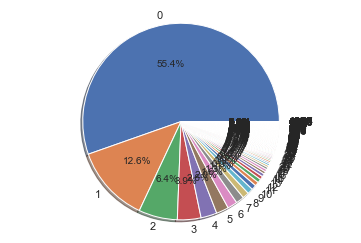

In [6]:
#Bar chart of independent variable
labels = data['Comments_in_Next_H_Hrs'].astype('category').cat.categories.tolist()
counts = data['Comments_in_Next_H_Hrs'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()


In [7]:
data.loc[ data['Comments_in_Next_H_Hrs'] < 1, 'Comments_in_Next_H_Hrs']  = 0
data.loc[ data['Comments_in_Next_H_Hrs'] >= 1, 'Comments_in_Next_H_Hrs']  = 1

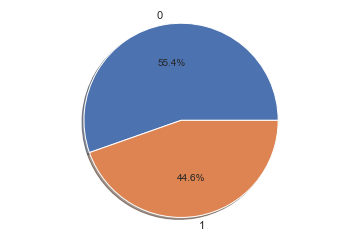

In [8]:
#Bar chart of independent variable
labels = data['Comments_in_Next_H_Hrs'].astype('category').cat.categories.tolist()
counts = data['Comments_in_Next_H_Hrs'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()


In [77]:
data.corr()

,Page_Likes,Page_Checkins,Page_visit_after_like,Page_category,D1,D2,D3,D4,D5,D6,...,Published_on_Friday,Published_on_Sat,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Comments_in_Next_H_Hrs
Page_Likes,1.000000,0.044807,0.623889,-0.042031,0.052409,0.157068,0.162368,0.145416,0.168368,0.025198,...,-0.009585,0.003508,-0.006410,-0.004281,-0.001866,0.012786,-0.002421,0.000066,0.001942,0.074498
Page_Checkins,0.044807,1.000000,0.167161,-0.060186,-0.009078,0.163089,0.153054,0.125221,0.171057,-0.002852,...,-0.006497,0.007592,-0.003616,-0.004903,-0.004674,0.004337,-0.001336,0.006868,0.003088,0.062850
Page_visit_after_like,0.623889,0.167161,1.000000,-0.148501,0.121792,0.492399,0.516836,0.467845,0.533483,0.078098,...,-0.027447,-0.007698,-0.021363,-0.005943,0.000210,0.024554,0.020660,-0.002727,-0.016624,0.192206
Page_category,-0.042031,-0.060186,-0.148501,1.000000,-0.023687,-0.314895,-0.234362,-0.195815,-0.283879,-0.010510,...,0.002661,-0.001977,-0.000914,0.000579,-0.003538,-0.003273,0.002504,0.000054,0.004509,-0.141774
D1,0.052409,-0.009078,0.121792,-0.023687,1.000000,0.066643,0.305412,0.365101,0.136530,0.819893,...,-0.003888,-0.009372,-0.005051,-0.008610,-0.005983,0.004060,0.013692,0.004484,-0.003490,0.057842
D2,0.157068,0.163089,0.492399,-0.314895,0.066643,1.000000,0.726182,0.596602,0.896847,0.035629,...,-0.011072,-0.008998,-0.009643,-0.009593,0.001484,0.010099,0.011145,0.004505,-0.008828,0.349246
D3,0.162368,0.153054,0.516836,-0.234362,0.305412,0.726182,1.000000,0.962699,0.911807,0.179864,...,-0.016886,-0.004117,-0.010903,-0.006183,0.000277,0.011781,0.011689,0.002632,-0.010076,0.354835
D4,0.145416,0.125221,0.467845,-0.195815,0.365101,0.596602,0.962699,1.000000,0.786959,0.225231,...,-0.016075,-0.001945,-0.009832,-0.004683,-0.000305,0.010966,0.009558,0.001663,-0.008013,0.315828
D5,0.168368,0.171057,0.533483,-0.283879,0.136530,0.896847,0.911807,0.786959,1.000000,0.055806,...,-0.015612,-0.009654,-0.012360,-0.009272,0.001318,0.013502,0.015062,0.003824,-0.013086,0.369427
D6,0.025198,-0.002852,0.078098,-0.010510,0.819893,0.035629,0.179864,0.225231,0.055806,1.000000,...,-0.004549,-0.005203,-0.004912,-0.005185,-0.001364,-0.000160,0.006364,0.008548,-0.003769,0.019933


In [9]:
#Feature Selection
Y = data['Comments_in_Next_H_Hrs']
X = data.drop(['Comments_in_Next_H_Hrs','D1' , 'D2' , 'D3' , 'D4' , 'D5' , 'D6' , 'D7' , 'D8' , 'D9' , 'D10' , 'D11' , 'D12' , 'D13' , 'D14' , 'D15' , 'D16' , 'D17' , 'D18' , 'D19' , 'D20' , 'D21' , 'D22' , 'D23' , 'D24' , 'D25','Post_Length' , 'Published_on_Sunday' , 'Published_on_Monday' ,'Published_on_Tuesday','Published_on_Wed', 'Published_on_Thurs' ,'Published_on_Friday', 'Published_on_Sat' , 'Monday' ,'Tuesday','Wednesday','Thursday' , 'Friday' , 'Saturday','Sunday','Post_promotion_status', ], axis = 1)

In [38]:
X.describe()

,Page_Likes,Page_Checkins,Page_visit_after_like,Page_category,Comment_before_time,Comment_in_last_24_hrs,Comment_in_24_to_48_hrs,Comment_in_24_hrs_after_publication_before_base_date/time,Difference_between_CC2_and_CC3,Selected_time_to_simulate_scenario,Post_Share_Count,H_hrs
count,8.131200e+04,81312.000000,8.131200e+04,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,1.313921e+06,4667.704336,4.475377e+04,24.255633,55.728933,21.872196,19.783464,52.588290,2.088732,35.407529,116.828758,23.766455
std,6.804951e+06,20561.261034,1.109279e+05,19.949156,136.735612,75.349527,71.753185,127.673521,93.885123,20.958361,945.066795,1.913700
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,-1793.000000,0.000000,1.000000,1.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,2.000000,0.000000,0.000000,2.000000,-6.000000,17.000000,2.000000,24.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,11.000000,2.000000,0.000000,10.000000,0.000000,35.000000,13.000000,24.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,46.000000,11.000000,9.000000,44.000000,3.000000,53.000000,61.000000,24.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2438.000000,2042.000000,2040.000000,2184.000000,2042.000000,72.000000,144860.000000,24.000000


In [10]:
#Creating train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size = 0.3)

print ('X_train shape is : ', X_train.shape)
print('X_test shape is : ', X_test.shape)
print('Y_train shape is : ', Y_train.shape)
print('Y_test shape is : ', Y_test.shape)


X_train shape is :  (56918, 12)
X_test shape is :  (24394, 12)
Y_train shape is :  (56918,)
Y_test shape is :  (24394,)


In [11]:
#Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C:\Users\fateh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
#Support vector machines - linear kernel
from sklearn import svm 
svc1 = svm.SVC(kernel='linear')
svc1.fit(X_train_scaled, Y_train)
acc_svc = round(svc1.score(X_test_scaled, Y_test) * 100, 2)
acc_svc

79.2

In [13]:
predictions = svc1.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     13675
           1       0.77      0.75      0.76     10719

   micro avg       0.79      0.79      0.79     24394
   macro avg       0.79      0.79      0.79     24394
weighted avg       0.79      0.79      0.79     24394



In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, predictions))

[[11328  2347]
 [ 2728  7991]]


In [40]:
auc_roc=metrics.roc_auc_score(Y_test,predictions)
auc_roc

0.7869357952945555

In [42]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7869357952945555

Text(0.5, 0, 'False Positive Rate')

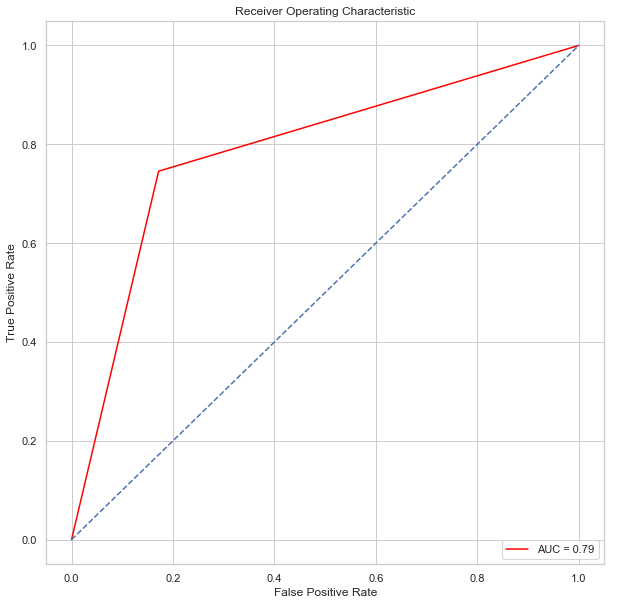

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [84]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X1, y1, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X1, y1 = X_train_scaled, Y_train


title = "Learning Curves (Linear SVM)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)

estimator = svc1
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

Automatically created module for IPython interactive environment


ModuleNotFoundError: No module named 'model_selection'

In [15]:
#Support vector machines - polynomial kernel
from sklearn import svm 
svc2 = svm.SVC(kernel='poly')
svc2.fit(X_train_scaled, Y_train)
acc_svc = round(svc2.score(X_test_scaled, Y_test) * 100, 2)
acc_svc

C:\Users\fateh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


71.83

In [16]:
predictions2 = svc2.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions2))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74     13675
           1       0.67      0.72      0.69     10719

   micro avg       0.72      0.72      0.72     24394
   macro avg       0.72      0.72      0.72     24394
weighted avg       0.72      0.72      0.72     24394



In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, predictions2))

[[9775 3900]
 [2972 7747]]


Text(0.5, 0, 'False Positive Rate')

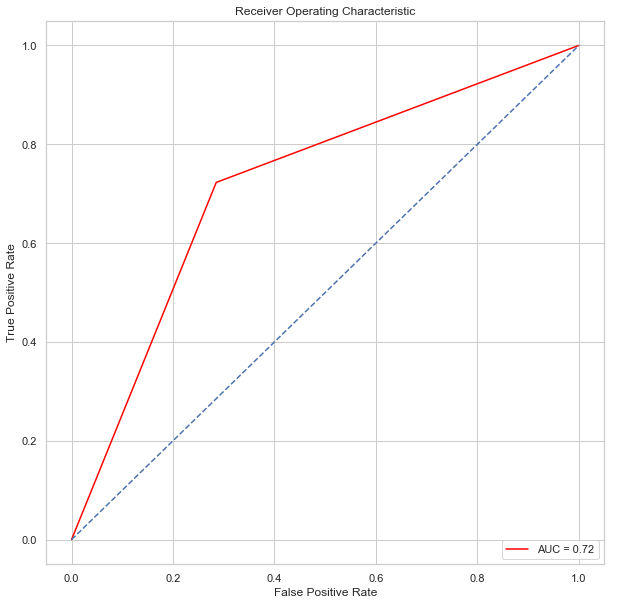

In [44]:
auc_roc=metrics.roc_auc_score(Y_test,predictions2)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions2)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [18]:
#Support vector machines - RBF kernel
from sklearn import svm 
svc3 = svm.SVC(kernel='rbf')
svc3.fit(X_train_scaled, Y_train)
acc_svc = round(svc3.score(X_test_scaled, Y_test) * 100, 2)
acc_svc

C:\Users\fateh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


78.1

In [19]:
predictions3 = svc3.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions3))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81     13675
           1       0.78      0.70      0.74     10719

   micro avg       0.78      0.78      0.78     24394
   macro avg       0.78      0.77      0.77     24394
weighted avg       0.78      0.78      0.78     24394



In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, predictions3))

[[11570  2105]
 [ 3237  7482]]


Text(0.5, 0, 'False Positive Rate')

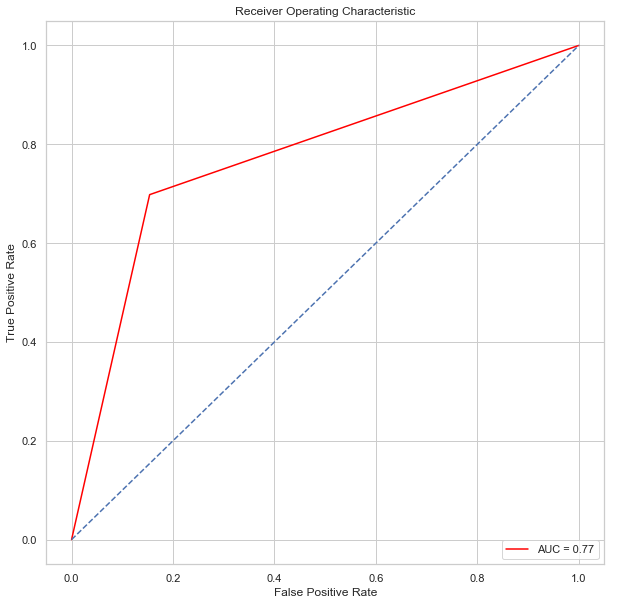

In [45]:
auc_roc=metrics.roc_auc_score(Y_test,predictions3)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions3)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [21]:
#DECISION TREES

In [22]:
#Unrestrained decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=None)
dtree.fit(X_train_scaled,Y_train)

predictions4 = dtree.predict(X_test_scaled)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,predictions4))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     13675
           1       0.74      0.74      0.74     10719

   micro avg       0.77      0.77      0.77     24394
   macro avg       0.77      0.77      0.77     24394
weighted avg       0.77      0.77      0.77     24394



In [23]:
print(confusion_matrix(Y_test,predictions4))

[[10920  2755]
 [ 2735  7984]]


In [24]:
dtree_score = round(dtree.score(X_test_scaled, Y_test) * 100, 2)
dtree_score

77.49

Text(0.5, 0, 'False Positive Rate')

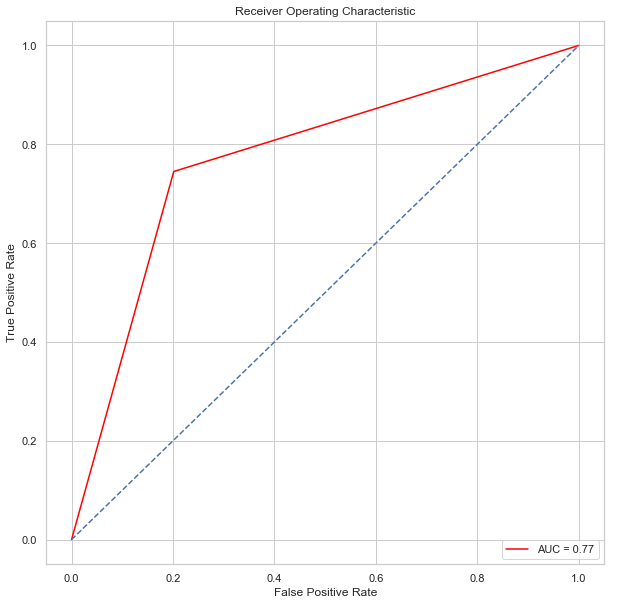

In [46]:
auc_roc=metrics.roc_auc_score(Y_test,predictions4)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions4)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [25]:
#Decision tree (max depth=3)
dtree2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
dtree2.fit(X_train_scaled,Y_train)

predictions5 = dtree2.predict(X_test_scaled)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,predictions5))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85     13675
           1       0.82      0.76      0.79     10719

   micro avg       0.83      0.83      0.83     24394
   macro avg       0.83      0.82      0.82     24394
weighted avg       0.83      0.83      0.82     24394



In [26]:
print(confusion_matrix(Y_test,predictions5))

[[11934  1741]
 [ 2524  8195]]


In [27]:
dtree_score = round(dtree2.score(X_test_scaled, Y_test) * 100, 2)
dtree_score

82.52

Text(0.5, 0, 'False Positive Rate')

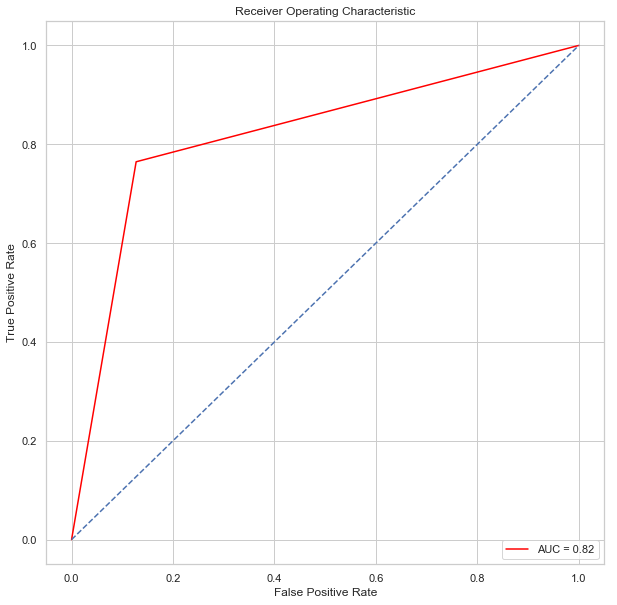

In [47]:
auc_roc=metrics.roc_auc_score(Y_test,predictions5)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions5)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [28]:
#Decision tree (max depth=2)
dtree3 = DecisionTreeClassifier(criterion='gini', max_depth=2)
dtree3.fit(X_train_scaled,Y_train)

predictions6 = dtree3.predict(X_test_scaled)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,predictions6))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     13675
           1       0.79      0.79      0.79     10719

   micro avg       0.81      0.81      0.81     24394
   macro avg       0.81      0.81      0.81     24394
weighted avg       0.81      0.81      0.81     24394



In [29]:
print(confusion_matrix(Y_test,predictions6))

[[11377  2298]
 [ 2243  8476]]


In [30]:
dtree_score = round(dtree3.score(X_test_scaled, Y_test) * 100, 2)
dtree_score

81.38

Text(0.5, 0, 'False Positive Rate')

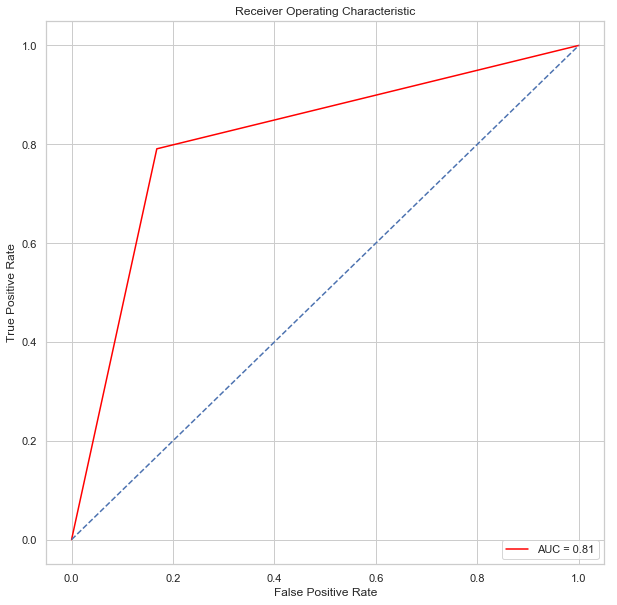

In [48]:
auc_roc=metrics.roc_auc_score(Y_test,predictions6)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions6)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [49]:
#Boosting

In [54]:
#AdaBoost, max depth=NONE: 
from sklearn.ensemble import AdaBoostClassifier 
classifier1 = AdaBoostClassifier(n_estimators=100)
classifier1.fit(X_train_scaled, Y_train)
Y_pred = classifier1.predict(X_test_scaled)
acc_boosted_decision_tree = round(classifier1.score(X_test_scaled, Y_test) * 100, 2)
acc_boosted_decision_tree

83.68

In [56]:
predictions7 = classifier1.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions7))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     13675
           1       0.83      0.79      0.81     10719

   micro avg       0.84      0.84      0.84     24394
   macro avg       0.84      0.83      0.83     24394
weighted avg       0.84      0.84      0.84     24394



In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, predictions7))

[[11970  1705]
 [ 2275  8444]]


Text(0.5, 0, 'False Positive Rate')

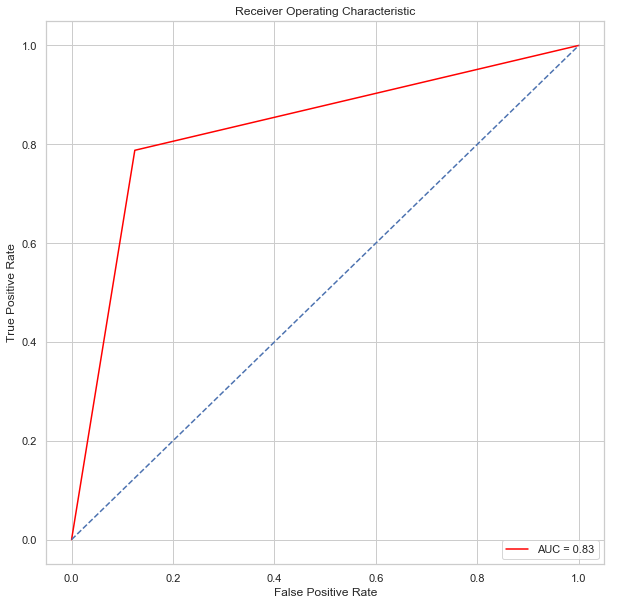

In [60]:
auc_roc=metrics.roc_auc_score(Y_test,predictions7)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions7)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [64]:
#AdaBoost, max depth=3: ****************************************************************
from sklearn.ensemble import AdaBoostClassifier 
classifier2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=500, learning_rate=1.3)
classifier2.fit(X_train_scaled, Y_train)
Y_pred = classifier2.predict(X_test_scaled)
acc_boosted_decision_tree = round(classifier2.score(X_test_scaled, Y_test) * 100, 2)
acc_boosted_decision_tree

82.41

In [66]:
predictions8 = classifier2.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions8))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     13675
           1       0.82      0.76      0.79     10719

   micro avg       0.82      0.82      0.82     24394
   macro avg       0.82      0.82      0.82     24394
weighted avg       0.82      0.82      0.82     24394



In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, predictions8))

[[11909  1766]
 [ 2526  8193]]


Text(0.5, 0, 'False Positive Rate')

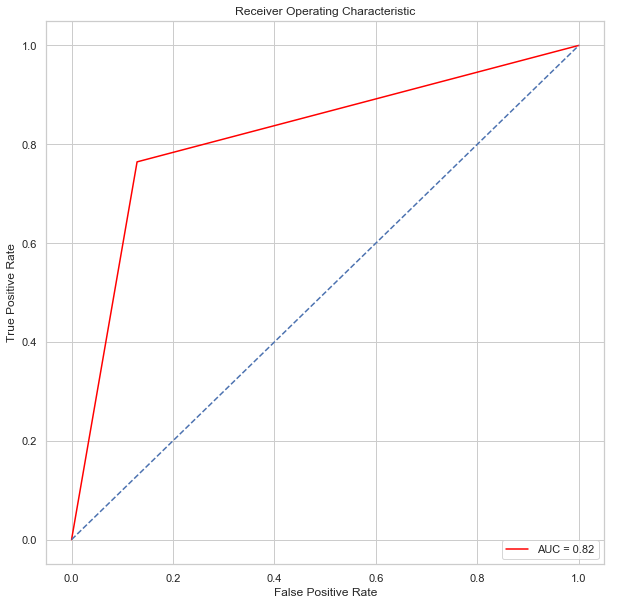

In [69]:
auc_roc=metrics.roc_auc_score(Y_test,predictions8)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions8)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [72]:
#AdaBoost, max depth=5: ***************************************************************
from sklearn.ensemble import AdaBoostClassifier 
classifier3 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=500, learning_rate=1.3)
classifier3.fit(X_train_scaled, Y_train)
Y_pred = classifier3.predict(X_test_scaled)
acc_boosted_decision_tree = round(classifier3.score(X_test_scaled, Y_test) * 100, 2)
acc_boosted_decision_tree

80.58

In [73]:
predictions9 = classifier3.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions9))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     13675
           1       0.79      0.77      0.78     10719

   micro avg       0.81      0.81      0.81     24394
   macro avg       0.80      0.80      0.80     24394
weighted avg       0.81      0.81      0.81     24394



In [75]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, predictions9))

[[11421  2254]
 [ 2483  8236]]


Text(0.5, 0, 'False Positive Rate')

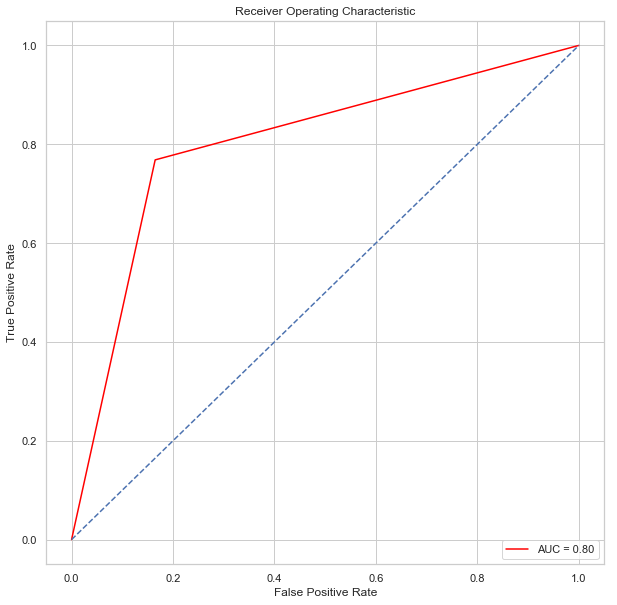

In [76]:
auc_roc=metrics.roc_auc_score(Y_test,predictions9)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions9)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [224]:
data2 = pd.read_csv('C:/Users/fateh/Desktop/turnover.csv')

In [225]:
data2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [226]:
data2.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Sales                     object
salary                    object
dtype: object

In [227]:
data2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Sales                    0
salary                   0
dtype: int64

In [228]:
#Values of Y variable
print(data2['left'].value_counts())

0    11428
1     3571
Name: left, dtype: int64


In [229]:
data2['salary'] = data2['salary'].fillna('low')
data2['Sales'] = data2['Sales'].fillna('accounting')
data2['Sales'] = data2['Sales'].map( {'accounting': 0, 'hr': 1, 'IT': 2, 'management': 3, 'marketing': 4, 'product_mng': 5, 'RandD': 6, 'sales': 7, 'support': 8, 'technical': 9} ).astype(float)
data2['salary'] = data2['salary'].map( {'low': 0, 'medium': 1, 'high': 2} ).astype(float)

In [230]:
data2.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Sales                    float64
salary                   float64
dtype: object

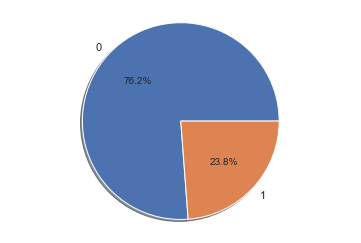

In [231]:
#Bar chart of independent variable
labels = data2['left'].astype('category').cat.categories.tolist()
counts = data2['left'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

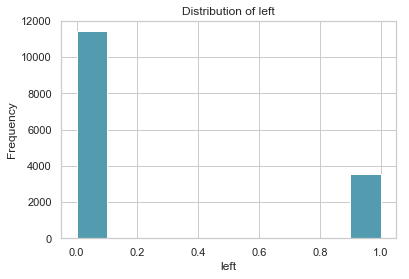

In [276]:
# Define a function for a histogram
def histogram(data, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.hist(data, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# Call the function to create plot
histogram(data = data2['left']
           , x_label = 'left'
           , y_label = 'Frequency'
           , title = 'Distribution of left')

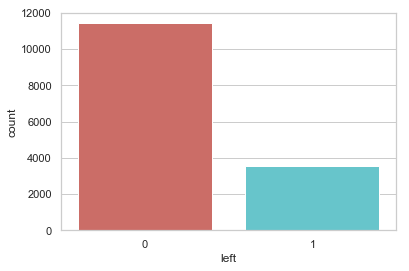

In [277]:
sns.countplot(x='left',data=data2, palette='hls')
plt.show()

In [232]:
#Feature Selection
Y2 = data2['left']
X2 = data2.drop(['left'] , axis = 1)

In [233]:
#Creating train and test data
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, random_state=0, test_size = 0.3)

print ('X2_train shape is : ', X2_train.shape)
print('X2_test shape is : ', X2_test.shape)
print('Y2_train shape is : ', Y2_train.shape)
print('Y2_test shape is : ', Y2_test.shape)

X2_train shape is :  (10499, 9)
X2_test shape is :  (4500, 9)
Y2_train shape is :  (10499,)
Y2_test shape is :  (4500,)


In [234]:
#Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)



C:\Users\fateh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [237]:
#Support vector machines - linear kernel
from sklearn import svm 
svc4 = svm.SVC(kernel='linear')
svc4.fit(X2_train_scaled, Y2_train)
acc_svc = round(svc4.score(X2_test_scaled, Y2_test) * 100, 2)
acc_svc

78.51

In [238]:
predictions11 = svc4.predict(X2_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(Y2_test, predictions11))


              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3462
           1       0.58      0.26      0.36      1038

   micro avg       0.79      0.79      0.79      4500
   macro avg       0.69      0.60      0.62      4500
weighted avg       0.76      0.79      0.75      4500



In [239]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y2_test, predictions11))


[[3261  201]
 [ 766  272]]


Text(0.5, 0, 'False Positive Rate')

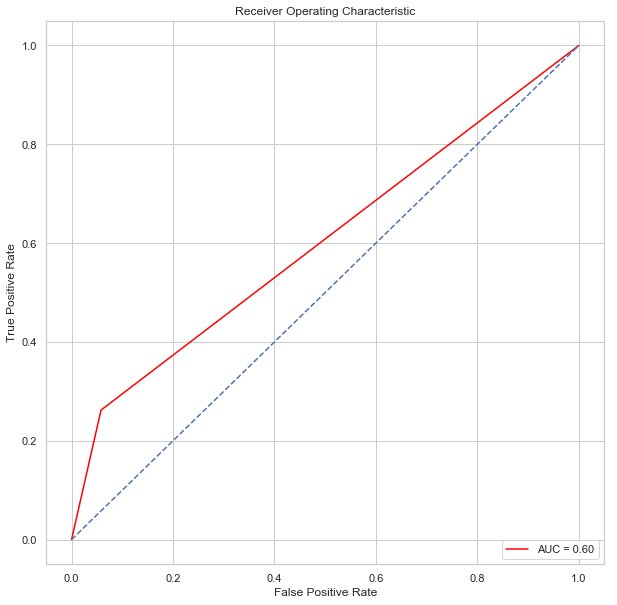

In [240]:
auc_roc=metrics.roc_auc_score(Y2_test,predictions11)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y2_test, predictions11)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')




In [241]:
#Support vector machines - Polynomial kernel
from sklearn import svm 
svc5 = svm.SVC(kernel='poly')
svc5.fit(X2_train_scaled, Y2_train)
acc_svc = round(svc5.score(X2_test_scaled, Y2_test) * 100, 2)
acc_svc

C:\Users\fateh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


82.02

In [242]:
predictions12 = svc5.predict(X2_test)
from sklearn.metrics import classification_report
print(classification_report(Y2_test, predictions12))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3462
           1       0.23      1.00      0.37      1038

   micro avg       0.23      0.23      0.23      4500
   macro avg       0.12      0.50      0.19      4500
weighted avg       0.05      0.23      0.09      4500



C:\Users\fateh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fateh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fateh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [243]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y2_test, predictions12))

[[   0 3462]
 [   0 1038]]


Text(0.5, 0, 'False Positive Rate')

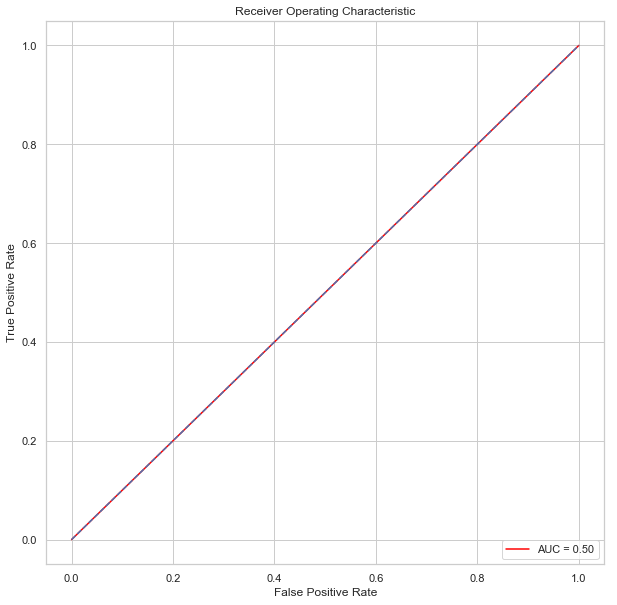

In [244]:
auc_roc=metrics.roc_auc_score(Y2_test,predictions12)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y2_test, predictions12)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



In [245]:
#Support vector machines - RBF kernel
from sklearn import svm 
svc6 = svm.SVC(kernel='rbf')
svc6.fit(X2_train, Y2_train)
acc_svc = round(svc6.score(X2_test, Y2_test) * 100, 2)
acc_svc

C:\Users\fateh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


95.38

In [246]:
predictions13 = svc6.predict(X2_test)
from sklearn.metrics import classification_report
print(classification_report(Y2_test, predictions13))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3462
           1       0.89      0.91      0.90      1038

   micro avg       0.95      0.95      0.95      4500
   macro avg       0.93      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500



In [278]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y2_test, predictions13))

[[3343  119]
 [  89  949]]


Text(0.5, 0, 'False Positive Rate')

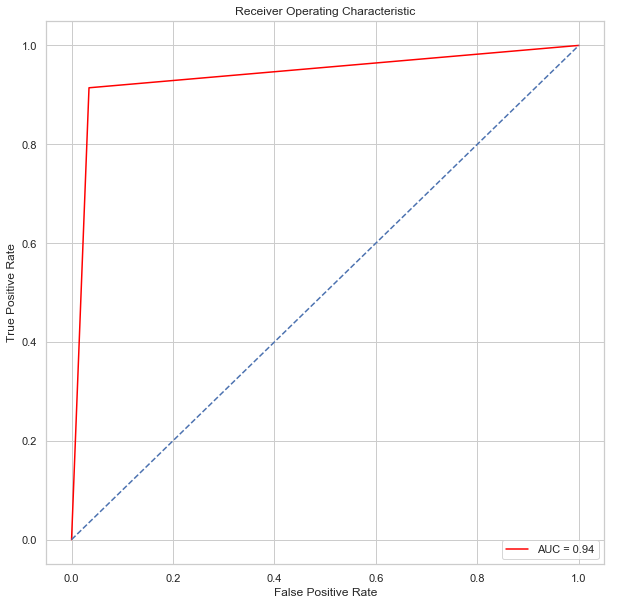

In [247]:
auc_roc=metrics.roc_auc_score(Y2_test,predictions13)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y2_test, predictions13)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [248]:
#Decision tree (max depth=5)
from sklearn.tree import DecisionTreeClassifier
dtree4 = DecisionTreeClassifier(criterion='gini', max_depth=5)
dtree4.fit(X2_train_scaled,Y2_train)

predictions14 = dtree4.predict(X2_test_scaled)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y2_test,predictions14))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3462
           1       0.96      0.92      0.94      1038

   micro avg       0.97      0.97      0.97      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [249]:
print(confusion_matrix(Y2_test,predictions14))

[[3418   44]
 [  78  960]]


In [251]:
dtree_score4 = round(dtree4.score(X2_test_scaled, Y2_test) * 100, 2)
dtree_score4

97.29

Text(0.5, 0, 'False Positive Rate')

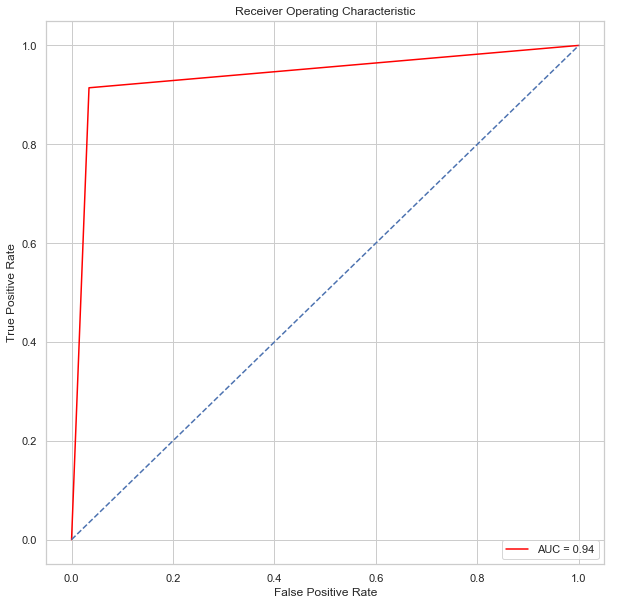

In [253]:
auc_roc=metrics.roc_auc_score(Y2_test,predictions14)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y2_test, predictions13)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [255]:
#Decision tree (max depth=10)
dtree5 = DecisionTreeClassifier(criterion='gini', max_depth=10)
dtree5.fit(X2_train_scaled,Y2_train)

predictions15 = dtree5.predict(X2_test_scaled)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y2_test,predictions15))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3462
           1       0.97      0.94      0.96      1038

   micro avg       0.98      0.98      0.98      4500
   macro avg       0.98      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [256]:
print(confusion_matrix(Y2_test,predictions15))

[[3433   29]
 [  59  979]]


In [257]:
dtree_score5 = round(dtree5.score(X2_test_scaled, Y2_test) * 100, 2)
dtree_score5

98.04

Text(0.5, 0, 'False Positive Rate')

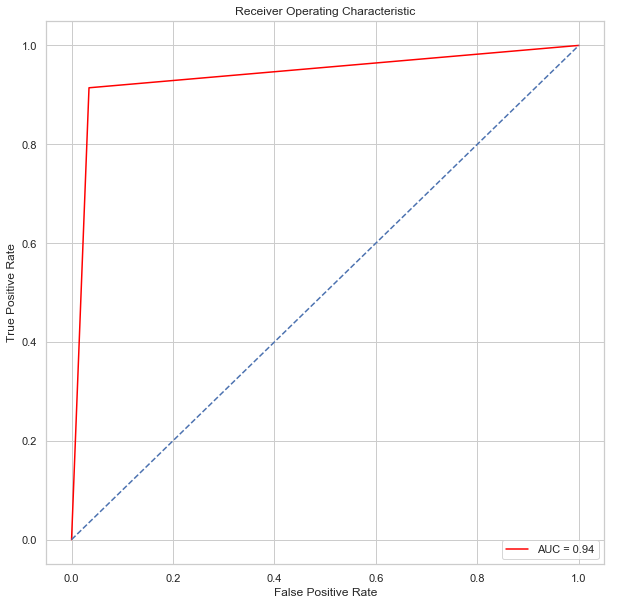

In [258]:
auc_roc=metrics.roc_auc_score(Y2_test,predictions15)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y2_test, predictions13)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [279]:
#Decision tree (max depth=8)
from sklearn.tree import DecisionTreeClassifier
dtree6 = DecisionTreeClassifier(criterion='gini', max_depth=None)
dtree6.fit(X2_train_scaled,Y2_train)

predictions16 = dtree6.predict(X2_test_scaled)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y2_test,predictions16))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.94      0.97      0.96      1038

   micro avg       0.98      0.98      0.98      4500
   macro avg       0.97      0.98      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [280]:
print(confusion_matrix(Y2_test,predictions16))

[[3400   62]
 [  30 1008]]


In [281]:
dtree_score6 = round(dtree6.score(X2_test_scaled, Y2_test) * 100, 2)
dtree_score6

97.96

Text(0.5, 0, 'False Positive Rate')

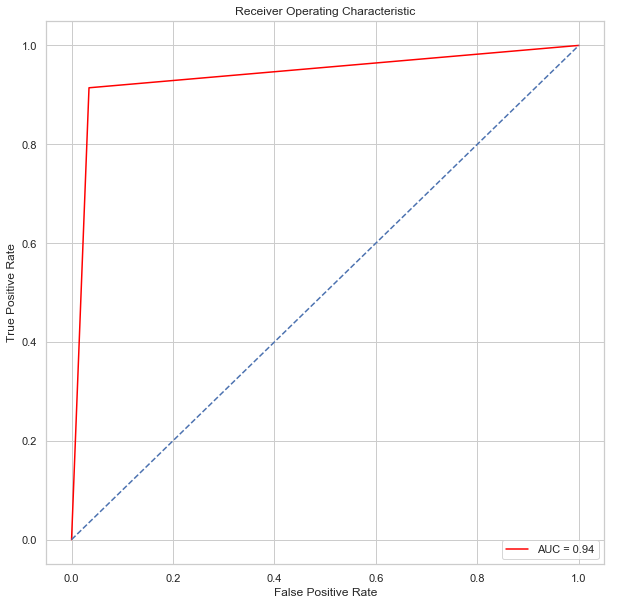

In [282]:
auc_roc=metrics.roc_auc_score(Y2_test,predictions16)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y2_test, predictions13)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [263]:
#BOOSTING (Turnover dataset)

In [264]:
#AdaBoost, max depth=5: 
from sklearn.ensemble import AdaBoostClassifier 
classifier4 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=500)
classifier4.fit(X2_train_scaled, Y2_train)
Y_pred4 = classifier4.predict(X2_test_scaled)
acc_boosted_decision_tree4 = round(classifier4.score(X2_test_scaled, Y2_test) * 100, 2)
acc_boosted_decision_tree4

98.8

In [265]:
predictions17 = classifier4.predict(X2_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(Y2_test, predictions17))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3462
           1       0.98      0.97      0.97      1038

   micro avg       0.99      0.99      0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [266]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y2_test, predictions17))

[[3439   23]
 [  31 1007]]


Text(0.5, 0, 'False Positive Rate')

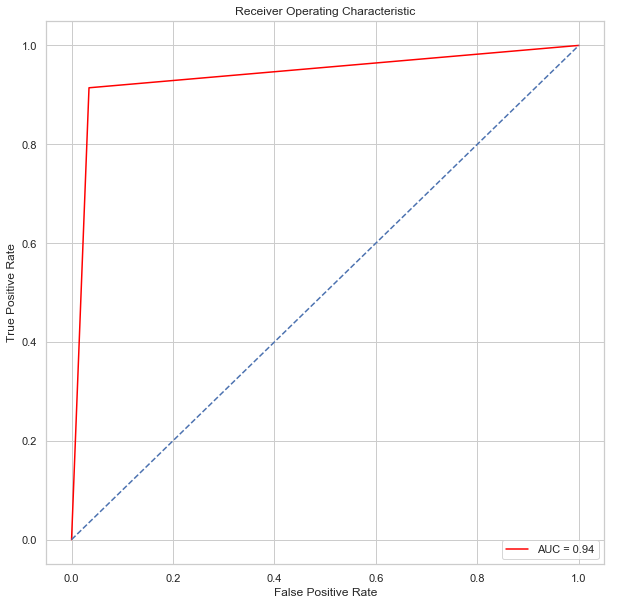

In [267]:
auc_roc=metrics.roc_auc_score(Y2_test,predictions17)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y2_test, predictions13)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [268]:
#AdaBoost, max depth=10: 
from sklearn.ensemble import AdaBoostClassifier 
classifier5 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=500)
classifier5.fit(X2_train_scaled, Y2_train)
Y_pred5 = classifier5.predict(X2_test_scaled)
acc_boosted_decision_tree5 = round(classifier4.score(X2_test_scaled, Y2_test) * 100, 2)
acc_boosted_decision_tree5

98.8

In [269]:
predictions18 = classifier5.predict(X2_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(Y2_test, predictions18))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.97      0.98      1038

   micro avg       0.99      0.99      0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [270]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y2_test, predictions18))

[[3450   12]
 [  34 1004]]


Text(0.5, 0, 'False Positive Rate')

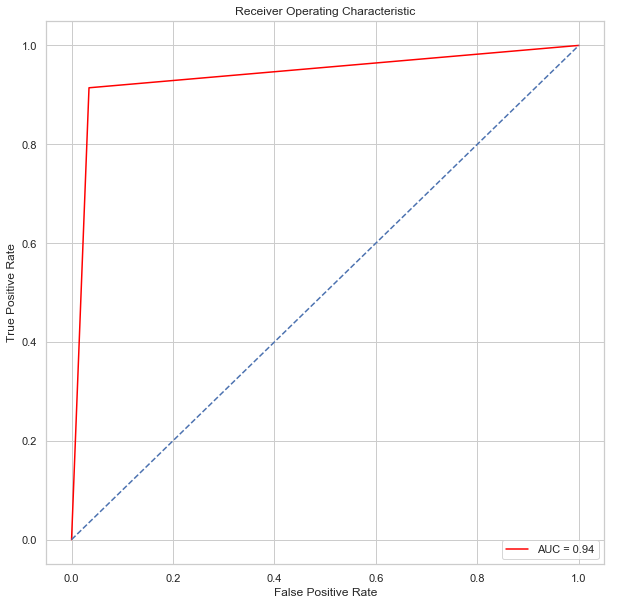

In [271]:
auc_roc=metrics.roc_auc_score(Y2_test,predictions18)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y2_test, predictions13)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [272]:
#AdaBoost, max depth=3: ***************************************************************
from sklearn.ensemble import AdaBoostClassifier 
classifier6 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=500, learning_rate=1.3)
classifier6.fit(X2_train_scaled, Y2_train)
Y_pred6 = classifier6.predict(X2_test_scaled)
acc_boosted_decision_tree6 = round(classifier6.score(X2_test_scaled, Y2_test) * 100, 2)
acc_boosted_decision_tree6

98.36

In [273]:
predictions19 = classifier6.predict(X2_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(Y2_test, predictions19))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3462
           1       0.96      0.97      0.96      1038

   micro avg       0.98      0.98      0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



In [274]:
print(confusion_matrix(Y2_test,predictions19))

[[3419   43]
 [  31 1007]]


Text(0.5, 0, 'False Positive Rate')

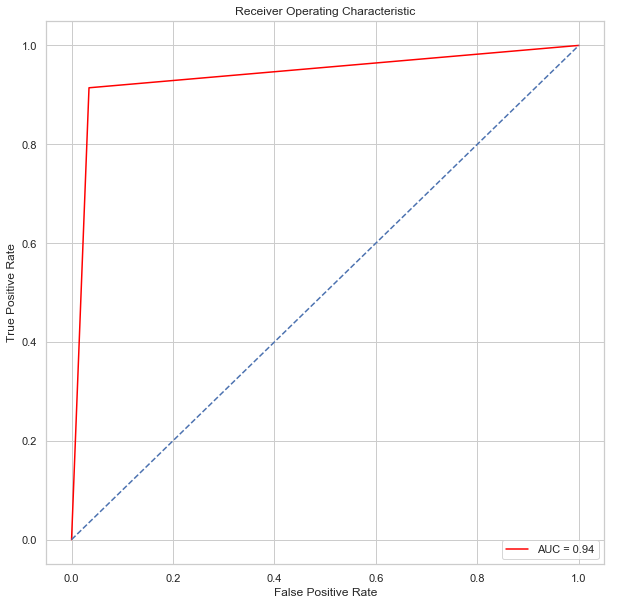

In [275]:
auc_roc=metrics.roc_auc_score(Y2_test,predictions19)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y2_test, predictions13)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')